Data from kaggle
https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal 

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

In [3]:
#import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font color=black size=5 face=雅黑>**Read the information and read the data**</font>

In [4]:
#read the data information
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


In [8]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<font color=black size=5 face=雅黑>**Exploratory data analysis**</font>

<AxesSubplot:xlabel='loan_status', ylabel='count'>

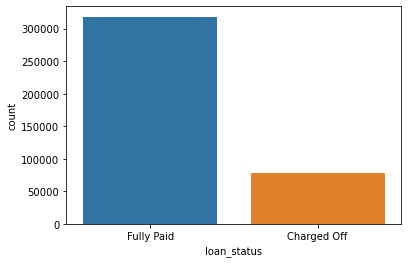

In [11]:
sns.countplot(x='loan_status',data=df)

<Figure size 1440x360 with 0 Axes>

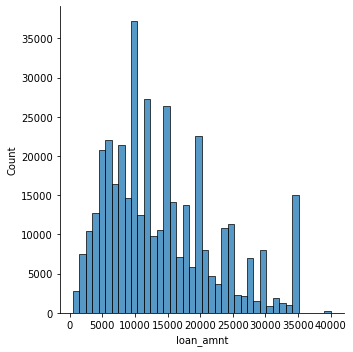

In [12]:
plt.figure(figsize=(20,5))
sns.displot(df['loan_amnt'],kde = False,bins=40)

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

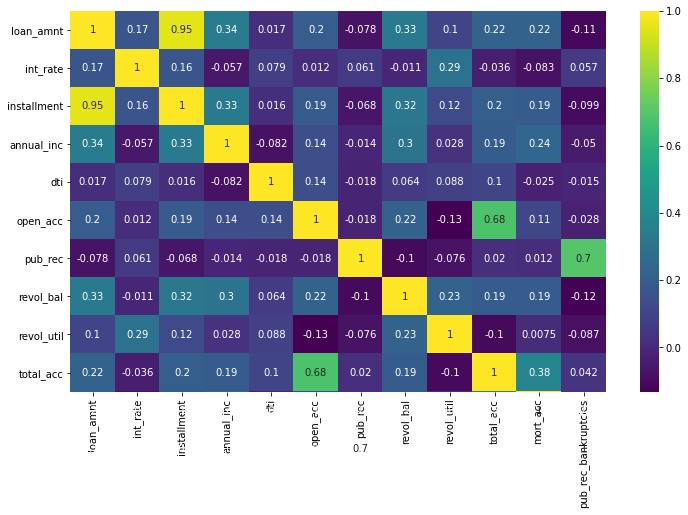

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

In [15]:
feat_info('installment')

In [16]:
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

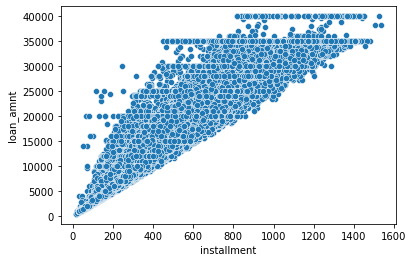

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
#high relation since they have probably same issue

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

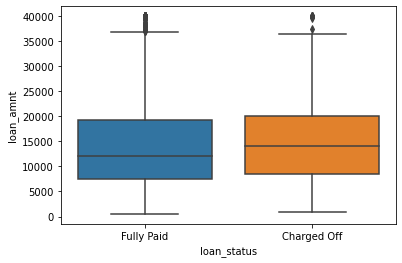

In [18]:
sns.boxplot(x='loan_status',y='loan_amnt',data = df)

In [19]:
df.groupby('loan_status')['loan_amnt'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()


array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [22]:
feat_info('sub_grade')

LC assigned loan subgrade


<AxesSubplot:xlabel='grade', ylabel='count'>

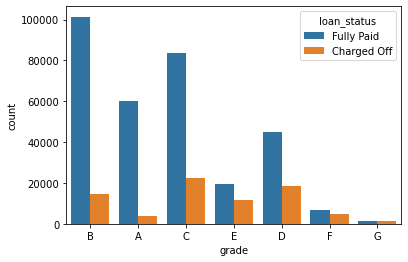

In [23]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

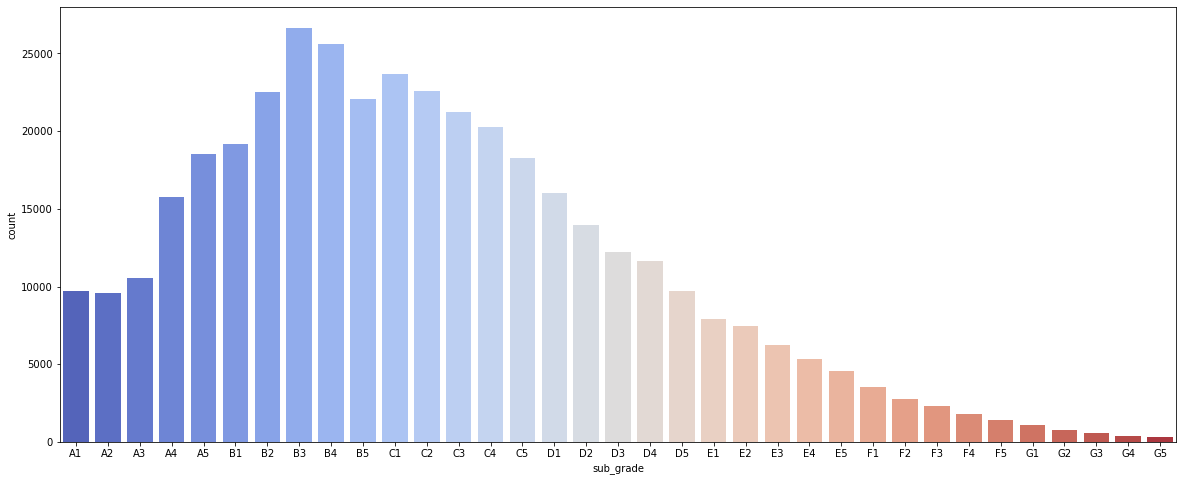

In [24]:
plt.figure(figsize=(20,8))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

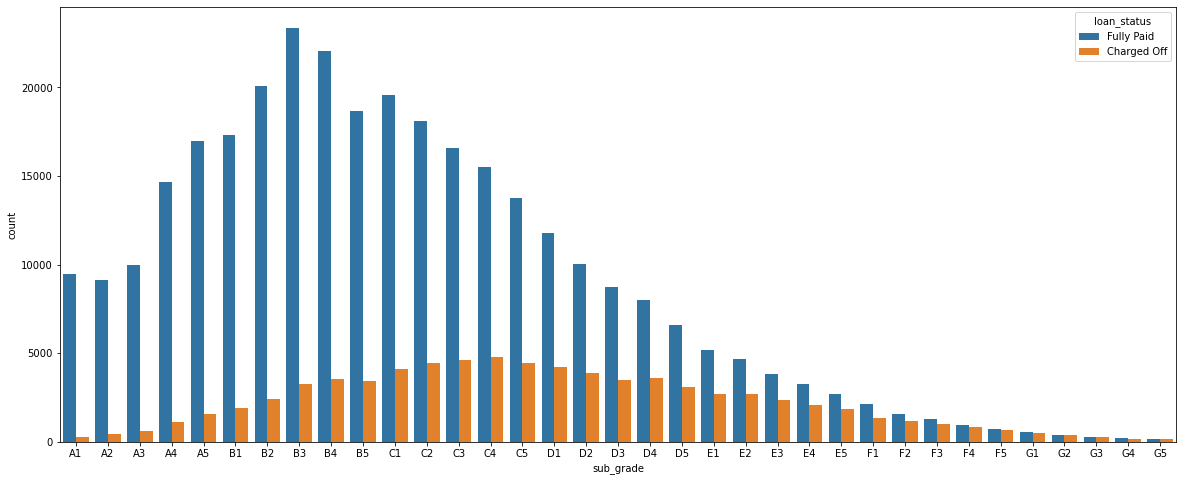

In [25]:
plt.figure(figsize=(20,8))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

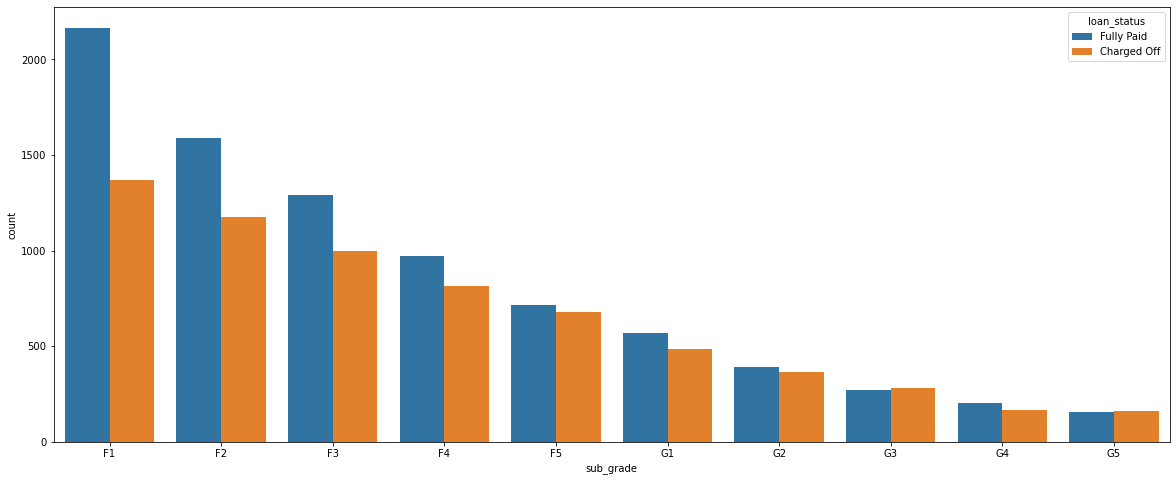

In [26]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=(20,8))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status',order=subgrade_order)

In [27]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [28]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

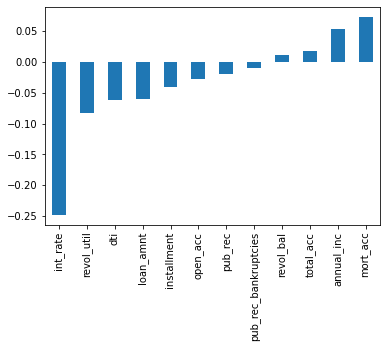

In [29]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

<AxesSubplot:>

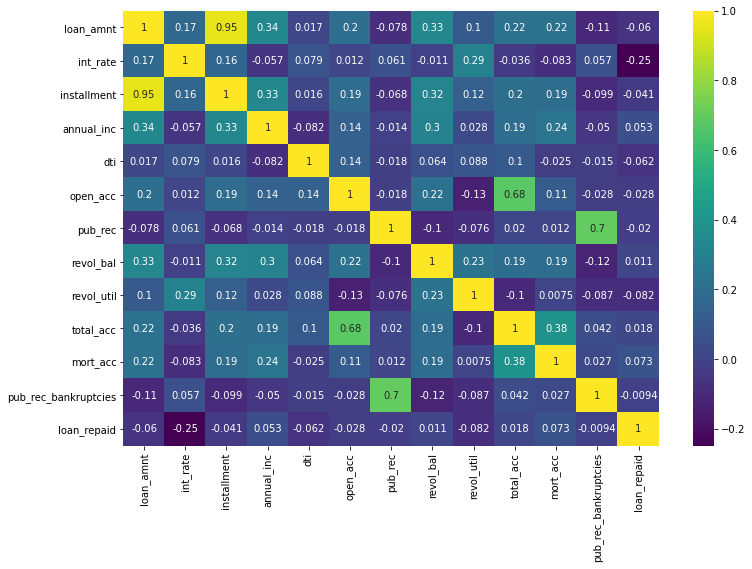

In [30]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True,cmap = 'viridis')

<font color=black size=5 face=雅黑>**Data preprocessing**</font>

In [31]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [32]:
len(df)

396030

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [35]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [36]:
df['emp_title'].nunique()

173105

In [37]:
df['emp_title'].value_counts()

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
Office manage                  1
Artinian Inc                   1
DUNNS AUTOS                    1
Royal American                 1
 Certified Dialysis Tech       1
Name: emp_title, Length: 173105, dtype: int64

In [38]:
#drop the emp title feature since there is 173105 unique. 
#we can group them by hige ,mid,low income
df = df.drop('emp_title',axis=1)

In [39]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [40]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

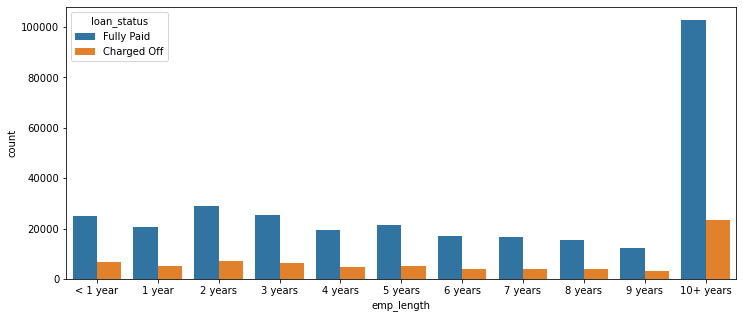

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data= df, order=emp_length_order,hue='loan_status')

In [42]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [43]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [44]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [45]:
emp_year_ratio=emp_co/(emp_fp+emp_co)

<AxesSubplot:xlabel='emp_length'>

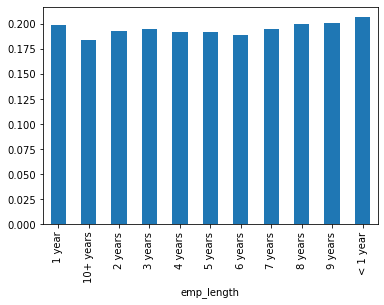

In [46]:
emp_year_ratio.plot(kind='bar')

In [47]:
#since there is no significant different between the emp_length
df = df.drop('emp_length',axis=1)

In [48]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [49]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [50]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [51]:
feat_info('title')

The loan title provided by the borrower


In [52]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [53]:
#title are same to the purpose
df = df.drop('title',axis=1)

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


In [55]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [56]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [57]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [58]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [59]:
def fill_mortacc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    

In [60]:
df['mort_acc']=df.apply(lambda x :fill_mortacc(x['total_acc'],x['mort_acc']),axis=1)

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

<font color=black size=5 face=雅黑>**Categorical Variables**</font>

In [63]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [64]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [65]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [66]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [67]:
#since grade is similar to sub_grade
df = df.drop('grade',axis=1)

In [68]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [69]:
feat_info('verification_status')
feat_info('application_type')
feat_info('initial_list_status')
feat_info('purpose')

Indicates if income was verified by LC, not verified, or if the income source was verified
Indicates whether the loan is an individual application or a joint application with two co-borrowers
The initial listing status of the loan. Possible values are – W, F
A category provided by the borrower for the loan request. 


In [70]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [71]:
#we put NONE & ANY into OTHER
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [72]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [73]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [74]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [76]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [77]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [78]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [79]:
df = df.drop('address',axis=1)

In [80]:
feat_info('issue_d')

The month which the loan was funded


In [81]:
df = df.drop('issue_d',axis=1)

In [82]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [84]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [85]:
df = df.drop('earliest_cr_line',axis=1)

<font color=black size=5 face=雅黑>**Train test split**</font>

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df = df.drop('loan_status',axis=1)

In [88]:
X = df.drop('loan_repaid',axis=1).values

In [89]:
y = df['loan_repaid'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<font color=black size=5 face=雅黑>**Normalizing data**</font>

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [94]:
X_train = scaler.fit_transform(X_train)

In [95]:
X_test = scaler.transform(X_test)

<font color=black size=5 face=雅黑>**Create the model**</font>

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [97]:
X_train.shape

(316175, 78)

In [118]:
model = Sequential()

model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [119]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/100
1236/1236 [==============================] - 11s 7ms/step - loss: 0.3508 - val_loss: 0.2719
Epoch 2/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2759 - val_loss: 0.2696
Epoch 3/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2698 - val_loss: 0.2684
Epoch 4/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2675 - val_loss: 0.2672
Epoch 5/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2662 - val_loss: 0.2661
Epoch 6/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2653 - val_loss: 0.2647
Epoch 7/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2647 - val_loss: 0.2658
Epoch 8/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2649 - val_loss: 0.2650
Epoch 9/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2645 - val_loss: 0.2636
Epoch 10/100
1236/1236 [==============================] - 8s 6ms/step - 

Epoch 80/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2607 - val_loss: 0.2632
Epoch 81/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2602 - val_loss: 0.2638
Epoch 82/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2607 - val_loss: 0.2631
Epoch 83/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2600 - val_loss: 0.2633
Epoch 84/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2603 - val_loss: 0.2631
Epoch 85/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2601 - val_loss: 0.2634
Epoch 86/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2601 - val_loss: 0.2641
Epoch 87/100
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2598 - val_loss: 0.2625
Epoch 88/100
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2603 - val_loss: 0.2638
Epoch 89/100
1236/1236 [==============================] - 8s 6ms

In [100]:
from tensorflow.keras.models import load_model

In [101]:
#model.save('4layers.h5')

<font color=black size=5 face=雅黑>**Evaluating Model performance**</font>


In [120]:
model.history.history

{'loss': [0.35079988837242126,
  0.27591392397880554,
  0.2698306441307068,
  0.2674507200717926,
  0.26615428924560547,
  0.2652635872364044,
  0.2646647095680237,
  0.26486441493034363,
  0.26450613141059875,
  0.26454854011535645,
  0.26375284790992737,
  0.2638842463493347,
  0.26365965604782104,
  0.2636682987213135,
  0.2634136378765106,
  0.2635158598423004,
  0.2632935345172882,
  0.2628612518310547,
  0.26349741220474243,
  0.26267290115356445,
  0.26310282945632935,
  0.26278308033943176,
  0.2627211809158325,
  0.2630288302898407,
  0.2624237835407257,
  0.2624722719192505,
  0.26250094175338745,
  0.2624501883983612,
  0.2624187767505646,
  0.26208004355430603,
  0.26241612434387207,
  0.2621529996395111,
  0.26234641671180725,
  0.2621239125728607,
  0.26214438676834106,
  0.2616083025932312,
  0.26213595271110535,
  0.26185402274131775,
  0.2616289258003235,
  0.2618926167488098,
  0.2615845203399658,
  0.26107650995254517,
  0.2615317702293396,
  0.2614775598049164,
  0.

<AxesSubplot:>

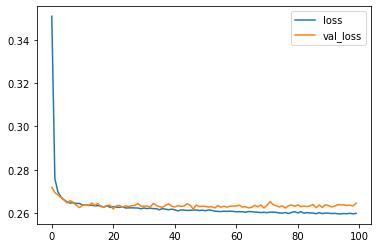

In [121]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 4s 2ms/step


In [122]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 2ms/step


In [123]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [124]:
confusion_matrix(y_test,predictions)

array([[ 6721,  8937],
       [    2, 63384]], dtype=int64)

In [128]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [129]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [130]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 53ms/step


array([[1]])

In [131]:
df.iloc[random_ind]['loan_repaid']

1.0